<a href="https://colab.research.google.com/github/nomccc/data-mining-Postest2/blob/main/010_Nur_Avivah_Postest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd

# (1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [39]:
#membaca dataset
df = pd.read_excel("sample_data/dataset_market_basket.xlsx", sheet_name="Sheet1")

In [40]:
#membuat tabular item
df

,whole milk,pastry,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegatables,canned beer,misc. beverages,...,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#melihat jumlah total dari tiap item
df.sum()

whole milk             5
pastry                 1
salty snack            1
sausage                4
semi-finished bread    1
yogurt                 1
soda                   3
pickled vegatables     1
canned beer            1
misc. beverages        1
hygiene articles       1
rolls/buns             3
frankfurter            2
whipped/sour cream     1
curd                   1
beef                   1
white bread            1
butter                 1
frozen vegetables      1
other vegetables       1
tropical fruit         1
sugar                  1
butter milk            1
specialty chocolate    1
frozen meals           1
dental care            1
root vegetables        1
detergent              1
dish cleaner           1
cling film/bags        1
dtype: int64

In [42]:
#melihat kolom yang terdapat dalam dataset
df.columns

Index(['whole milk', 'pastry', 'salty snack', 'sausage', 'semi-finished bread',
       'yogurt', 'soda', 'pickled vegatables', 'canned beer',
       'misc. beverages', 'hygiene articles', 'rolls/buns', 'frankfurter',
       'whipped/sour cream', 'curd', 'beef', 'white bread', 'butter',
       'frozen vegetables', 'other vegetables', 'tropical fruit', 'sugar',
       'butter milk', 'specialty chocolate', 'frozen meals', 'dental care',
       'root vegetables', 'detergent', 'dish cleaner', 'cling film/bags'],
      dtype='object')

In [43]:
#2 itemset
#menggunakan library untuk kombinasi item
from itertools import permutations 

twoSet = list(permutations(df.columns, 2 ))
twoSet

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'pickled vegatables'),
 ('whole milk', 'canned beer'),
 ('whole milk', 'misc. beverages'),
 ('whole milk', 'hygiene articles'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'frankfurter'),
 ('whole milk', 'whipped/sour cream'),
 ('whole milk', 'curd'),
 ('whole milk', 'beef'),
 ('whole milk', 'white bread'),
 ('whole milk', 'butter'),
 ('whole milk', 'frozen vegetables'),
 ('whole milk', 'other vegetables'),
 ('whole milk', 'tropical fruit'),
 ('whole milk', 'sugar'),
 ('whole milk', 'butter milk'),
 ('whole milk', 'specialty chocolate'),
 ('whole milk', 'frozen meals'),
 ('whole milk', 'dental care'),
 ('whole milk', 'root vegetables'),
 ('whole milk', 'detergent'),
 ('whole milk', 'dish cleaner'),
 ('whole milk', 'cling film/bags'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('

In [44]:
#untuk melihat 2 kombinasi item yang bernilai 1 dan 1
twoSet_baru = []
for item in twoSet:
  if len(df[(df[item[0]]==1) & (df[item[1]]==1)]) >0:
    twoSet_baru.append(item)
twoSet_baru

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('whole milk', 'sausage'),
 ('whole milk', 'semi-finished bread'),
 ('whole milk', 'yogurt'),
 ('whole milk', 'soda'),
 ('whole milk', 'rolls/buns'),
 ('whole milk', 'butter'),
 ('pastry', 'whole milk'),
 ('pastry', 'salty snack'),
 ('salty snack', 'whole milk'),
 ('salty snack', 'pastry'),
 ('sausage', 'whole milk'),
 ('sausage', 'semi-finished bread'),
 ('sausage', 'yogurt'),
 ('sausage', 'hygiene articles'),
 ('sausage', 'rolls/buns'),
 ('semi-finished bread', 'whole milk'),
 ('semi-finished bread', 'sausage'),
 ('semi-finished bread', 'yogurt'),
 ('yogurt', 'whole milk'),
 ('yogurt', 'sausage'),
 ('yogurt', 'semi-finished bread'),
 ('soda', 'whole milk'),
 ('soda', 'pickled vegatables'),
 ('soda', 'frankfurter'),
 ('soda', 'whipped/sour cream'),
 ('pickled vegatables', 'soda'),
 ('canned beer', 'misc. beverages'),
 ('misc. beverages', 'canned beer'),
 ('hygiene articles', 'sausage'),
 ('rolls/buns', 'whole milk'),
 ('rolls

In [45]:
#Menghitung jumlah total kombinasi yang sama
hitung = {} #Ganti dictionary
for items in twoSet_baru:
  banyak_data= len(df[
      (df[items[0]]==1) & (df[items[1]]==1)
      ])
  hitung[str(items)] = banyak_data

hitung

{"('whole milk', 'pastry')": 1,
 "('whole milk', 'salty snack')": 1,
 "('whole milk', 'sausage')": 2,
 "('whole milk', 'semi-finished bread')": 1,
 "('whole milk', 'yogurt')": 1,
 "('whole milk', 'soda')": 1,
 "('whole milk', 'rolls/buns')": 1,
 "('whole milk', 'butter')": 1,
 "('pastry', 'whole milk')": 1,
 "('pastry', 'salty snack')": 1,
 "('salty snack', 'whole milk')": 1,
 "('salty snack', 'pastry')": 1,
 "('sausage', 'whole milk')": 2,
 "('sausage', 'semi-finished bread')": 1,
 "('sausage', 'yogurt')": 1,
 "('sausage', 'hygiene articles')": 1,
 "('sausage', 'rolls/buns')": 2,
 "('semi-finished bread', 'whole milk')": 1,
 "('semi-finished bread', 'sausage')": 1,
 "('semi-finished bread', 'yogurt')": 1,
 "('yogurt', 'whole milk')": 1,
 "('yogurt', 'sausage')": 1,
 "('yogurt', 'semi-finished bread')": 1,
 "('soda', 'whole milk')": 1,
 "('soda', 'pickled vegatables')": 1,
 "('soda', 'frankfurter')": 1,
 "('soda', 'whipped/sour cream')": 1,
 "('pickled vegatables', 'soda')": 1,
 "('can

In [46]:
len(df)

19

In [47]:
#menghitung nilai support
print("---")
for a,ab in hitung.items():
  print(f"{a} support = {round(ab/len(df)*100)}%")

---
('whole milk', 'pastry') support = 5%
('whole milk', 'salty snack') support = 5%
('whole milk', 'sausage') support = 11%
('whole milk', 'semi-finished bread') support = 5%
('whole milk', 'yogurt') support = 5%
('whole milk', 'soda') support = 5%
('whole milk', 'rolls/buns') support = 5%
('whole milk', 'butter') support = 5%
('pastry', 'whole milk') support = 5%
('pastry', 'salty snack') support = 5%
('salty snack', 'whole milk') support = 5%
('salty snack', 'pastry') support = 5%
('sausage', 'whole milk') support = 11%
('sausage', 'semi-finished bread') support = 5%
('sausage', 'yogurt') support = 5%
('sausage', 'hygiene articles') support = 5%
('sausage', 'rolls/buns') support = 11%
('semi-finished bread', 'whole milk') support = 5%
('semi-finished bread', 'sausage') support = 5%
('semi-finished bread', 'yogurt') support = 5%
('yogurt', 'whole milk') support = 5%
('yogurt', 'sausage') support = 5%
('yogurt', 'semi-finished bread') support = 5%
('soda', 'whole milk') support = 5%
(

In [48]:
#menghitung confidence

print("---")
for a,ab in hitung.items():
  #"A->B"
  i = eval(a) #Ubah ke list dari string
  print(f"{i[0]}->{i[1]} |---| Confidence = {ab/df[i[0]].sum()*100}%")

---
whole milk->pastry |---| Confidence = 20.0%
whole milk->salty snack |---| Confidence = 20.0%
whole milk->sausage |---| Confidence = 40.0%
whole milk->semi-finished bread |---| Confidence = 20.0%
whole milk->yogurt |---| Confidence = 20.0%
whole milk->soda |---| Confidence = 20.0%
whole milk->rolls/buns |---| Confidence = 20.0%
whole milk->butter |---| Confidence = 20.0%
pastry->whole milk |---| Confidence = 100.0%
pastry->salty snack |---| Confidence = 100.0%
salty snack->whole milk |---| Confidence = 100.0%
salty snack->pastry |---| Confidence = 100.0%
sausage->whole milk |---| Confidence = 50.0%
sausage->semi-finished bread |---| Confidence = 25.0%
sausage->yogurt |---| Confidence = 25.0%
sausage->hygiene articles |---| Confidence = 25.0%
sausage->rolls/buns |---| Confidence = 50.0%
semi-finished bread->whole milk |---| Confidence = 100.0%
semi-finished bread->sausage |---| Confidence = 100.0%
semi-finished bread->yogurt |---| Confidence = 100.0%
yogurt->whole milk |---| Confiden

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

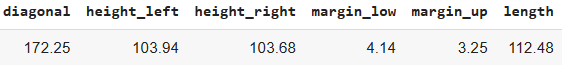
<!-- 1412 -->

In [49]:
#menampilkan data



In [50]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import math
import pandas as pd

ds = pd.read_csv("sample_data/deteksi_uang_palsu.csv")

#data target prediksi
data_banding = [172.25, 103.94, 103.68, 4.14, 3.25, 112.48]

# fungsi untuk menghitung jarak antara dua data
jarak = []
for i in range(len(ds)):
  distance = 0
  for j in range(1, len(ds.columns)):
    distance += (ds.iloc[i,j] - data_banding[j-1])**2
  jarak.append(math.sqrt(distance))

#tambahkan kolom jarak pada dataset
ds['jarak'] = jarak

#tampilkan hasil
print(ds)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    172.06       104.24        103.66        4.24       3.10   
1        True    171.66       103.68        103.41        4.35       3.33   
2        True    172.23       104.00        103.35        4.43       2.95   
3        True    172.07       104.21        103.82        4.29       3.35   
4        True    171.79       104.57        104.04        4.26       3.15   
5       False    172.00       104.23        104.52        5.76       3.37   
6       False    171.56       104.03        103.93        5.47       3.50   
7       False    171.90       104.33        104.40        4.70       3.31   
8       False    171.84       104.06        104.10        4.87       3.25   
9       False    172.11       104.14        104.15        4.84       3.28   

   length     jarak  
0  113.02  0.671267  
1  113.74  1.458321  
2  113.12  0.834626  
3  113.30  0.910934  
4  113.46  1.312593  
5  110.94  2.421281 

In [51]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)

ds_new = pd.read_csv("sample_data/deteksi_uang_palsu.csv")

#menambahkan kolom jarak untuk tiap data terhadap target prediksi
ds_new["jarak"] = (
    (ds_new.diagonal - data_banding[0])**2 +
    (ds_new.height_left - data_banding[1])**2 +
    (ds_new.height_left - data_banding[2])**2 +
    (ds_new.margin_low - data_banding[3])**2 +
    (ds_new.margin_up - data_banding[4])**2 +
    (ds_new.length - data_banding[5])**2) ** 0.5

#mengurutkan data berdasarkan jarak terdekat
k = int(math.sqrt(len(ds_new)))
ds_urut = ds_new.sort_values(by=['jarak']).head(k)

#menampilkan hasil pengurutan
print(ds_urut)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
2        True    172.23       104.00        103.35        4.43       2.95   
0        True    172.06       104.24        103.66        4.24       3.10   
3        True    172.07       104.21        103.82        4.29       3.35   

   length     jarak  
2  113.12  0.830723  
0  113.02  0.873957  
3  113.30  1.044557  


In [52]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

ds_tiga = pd.read_csv("sample_data/deteksi_uang_palsu.csv")

#hitung jarak euclidean
ds_tiga["jarak"] = (
    ((ds_tiga["diagonal"]-data_banding[0])**2) +
    ((ds_tiga["height_left"]-data_banding[1])**2) +
    ((ds_tiga["height_right"]-data_banding[2])**2) +
    ((ds_tiga["margin_low"]-data_banding[3])**2) +
    ((ds_tiga["margin_up"]-data_banding[4])**2) +
    ((ds_tiga["length"]-data_banding[5])**2)
)

#urutkan data berdasarkan jarak terdekat
k = round(len(ds_tiga)**0.5) #K = akar 2 dari banyak data
ds_tiga = ds_tiga.sort_values("jarak")[:k]

#menetukan hasil prediksi berdasarkan label terbanyak
pred = ds_tiga["is_genuine"].value_counts().idxmax()

print("Hasil prediksi: ", pred)

Hasil prediksi:  True


# (3) Analisis

> Nama : Nur Avivah

> Nim : 2109116010


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

# Judul dataset: **Stroke Prediction Dataset**
sumber: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?datasetId=1120859&sortBy=voteCount

# **CRISP-DM**


---


# BUSINESS UNDERSTANDING

1.   Business Objective:
> Menghasilkan prediksi pengidap stroke dengan mengidentifikasi faktor yang mempengaruhi stoke.

2.   Assess Situation:
> dataset terdiri dari 5109 baris data, terdapat 12 kolom, tak terdapat duplikasi data

3.   Data Mining Goals: 
> Menghasilkan prediksi pengidap stroke berdasarkan beberapa faktor


4.   Project Plan
> pemahaman data dan eksplorasi, analisis faktor yang mempengaruhi terjadinya strok, melakukan prediksi terjadinya strok.

# DATA UNDERSTANDING

1.   Initial Data
> Mendapatkan data prediksi penyakit stroke dari situs kaggle

2.   Describe Data
> Data terdiri dari 5109 baris dengan 12 kolom, termasuk data penyakit lainnya seperti hipertensi, heart desease.Tiap data memiliki keunikan da

3.   Explore Data
> Mencari tahu seberapa berpengaruh suatu penyakit lainnya dan kebiasaan manusia terhadap mengidapnya stroke.

4.   Verify Data Quality
> Memeriksa validitas dan keakuratan data prediksi stroke

# DATA PREPARATION

1.   Select Data
> Memilih data dari 11 kolom/atribut lainnya selain kolom stroke. karena kolom tersebut merupakan penentu prediksi stroke atau tidaknya.

2.   Clean Data
> Membersihkan data dari duplikasi, data yang hilang, dan data yang kosong. Kolom BMI memiliki data yang memiliki nilai null sehingga ketika membersihkan data, jumlah data menjadi 4909 baris.

3.   Construct Data
> Menambahkan variabel bmi_group yaitu pengelompokkan bmi pada data dengan mengkategorikan bmi.

4.   Integrate Data
> Menggabungkan data dari sumber yang berbeda jika diperlukan untuk kebutuhan prediksi

5.  Format Data
> Menyesuaikan format tipe data tiap data yang disesuaikan dengan kebutuhan dan kolom. contohnya seperti gender yang bertipe string, data pada kolom age yang bertipe integer, dan lain-lain.




















In [53]:
#DATA PREPARATION
import pandas as pd

ds = pd.read_csv("sample_data/healthcare-dataset-stroke-data.csv")
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [54]:
#DATA CLEANING

#mencari data yang duplikat
ds[ds.duplicated()]

ds.drop_duplicates(inplace=True)

#memastikan sudah tak ada data yang duplikat
ds.duplicated().sum()

0

In [55]:
#mencari data yang null

#melihat data null di tiap kolom dalam dataset
ds.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [56]:
# #mengganti nilai null dengan mean atau menghapus data yang terdapat nilai null didalam


# ds.bmi[ds.bmi.isnull()] = ds.bmi.mean() #mengganti dengan nilai mean
# ds.bmi.isnull().sum()

In [57]:
#menghapus data yang memiliki nilai data didalam
ds = ds.dropna()

In [58]:
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [59]:
ds.bmi.max()

97.6

In [60]:
#construct data dengan membuat variabel baru yaitu bmi_group

ds["bmi_group"] = pd.cut(ds['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']) 


<ipython-input-60-855049c453d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["bmi_group"] = pd.cut(ds['bmi'], bins=[0, 18.5, 25, 30, 35, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])


In [61]:
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese II
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese I
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese I
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,Normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Obese II
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Obese I
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Overweight
